# Project Name: Walmart Data Analysis

Project Overview : 

This project is an end-to-end data analysis solution designed to extract critical business
insights from Walmart sales data. We need to use Python for data processing and analysis,
MySQL as the database. The project is ideal for data analysts looking to develop skills in data
manipulation, SQL querying, and data pipeline creation.

- Data Source: Download the Walmart sales datasets from Kaggle.
- Dataset Link: https://www.kaggle.com/datasets/najir0123/walmart-10k-sales-datasets

In [4]:
import mysql.connector

In [5]:
import pandas as pd

In [6]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Singh_prakash2324@',
    database='st_project_1'
)

query = "SELECT * FROM walmart_dataset"
df = pd.read_sql(query, conn)


/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_10412/1687709783.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df.head()

,Invoice_ID,Branch,City,category,Unit_price,Quantity,Date,Time,Payment_Method,Rating,Profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7,08/02/19,10:37:00,Ewallet,5.3,0.48


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice_ID      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   Unit_price      9969 non-null   object 
 5   Quantity        9969 non-null   int64  
 6   Date            9969 non-null   object 
 7   Time            9969 non-null   object 
 8   Payment_Method  9969 non-null   object 
 9   Rating          9969 non-null   float64
 10  Profit_margin   9969 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 856.8+ KB


In [14]:
df.describe()

,Invoice_ID,Unit_price,Quantity,Rating,Profit_margin
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744
std,2886.217349,21.203766,1.605455,1.763723,0.090659
min,1.000000,10.080000,1.000000,3.000000,0.180000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000


In [13]:
# Drop duplicates: 
df.drop_duplicates(inplace=True)

In [12]:
## Handle missing values: 
df.isnull().sum()

Invoice_ID        0
Branch            0
City              0
category          0
Unit_price        0
Quantity          0
Date              0
Time              0
Payment_Method    0
Rating            0
Profit_margin     0
Total_Amount      0
dtype: int64

In [11]:
# Remove '$' and convert to float
df['Unit_price'] = df['Unit_price'].replace('[\$,]', '', regex=True).astype(float)

# Confirm changes
print(df['Unit_price'].head())
print(df['Unit_price'].dtype)

0    74.69
1    15.28
2    46.33
3    58.22
4    86.31
Name: Unit_price, dtype: float64
float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_10412/272176125.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Unit_price'] = df['Unit_price'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
## Add Total_Amount column:
df['Total_Amount'] = df['Unit_price'] * df['Quantity']

## Use Seaborn/Matplotlib for visualizations:

In [15]:
## Save cleaned data:
df.to_csv("data/walmart_cleaned_dataset.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'data'

#### Exploratory Data Analysis (EDA)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/prakash/Desktop/walmart_analysis_project/notebooks/outputs/revenue_by_branch.png'

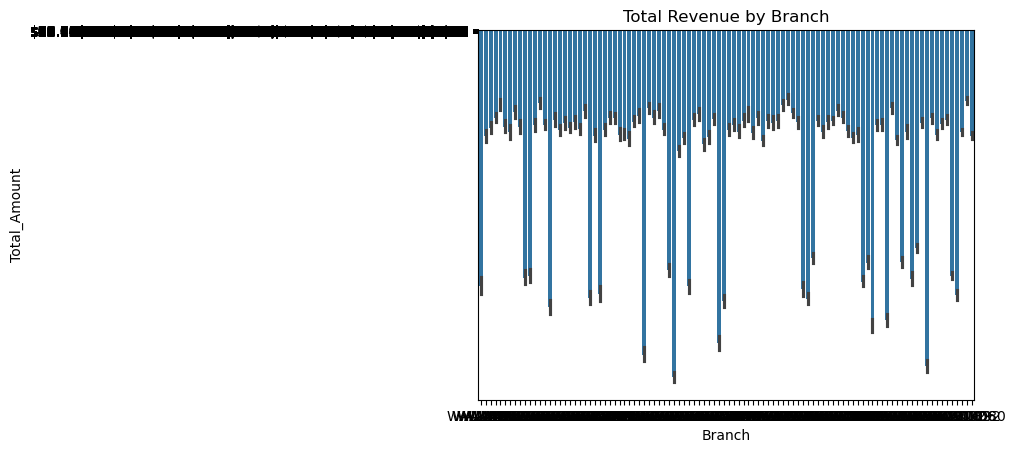

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Revenue by Branch
sns.barplot(x='Branch', y='Total_Amount', data=df, estimator=sum)
plt.title("Total Revenue by Branch")
plt.savefig('outputs/revenue_by_branch.png', dpi=300)
plt.show()

##### Best Product Category

/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_6176/1303393833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")


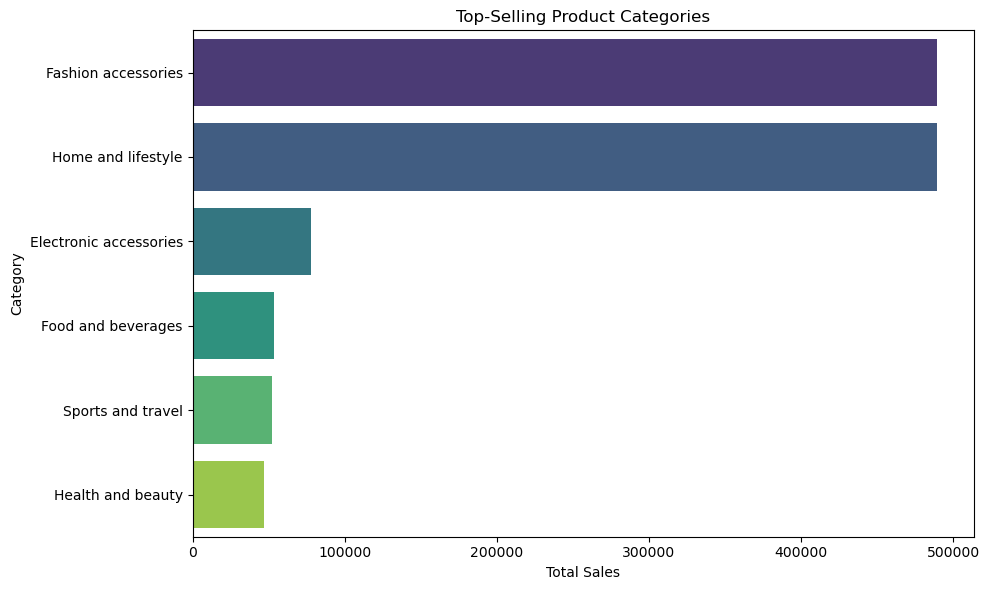

In [24]:
# Total sales by product category
product_sales = df.groupby('category')['Total_Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
plt.title("Top-Selling Product Categories")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [22]:
## list of columns in table 
print(df.columns.tolist())

['Invoice_ID', 'Branch', 'City', 'category', 'Unit_price', 'Quantity', 'Date', 'Time', 'Payment_Method', 'Rating', 'Profit_margin', 'Total_Amount']


#### Payment Method Trends

/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_6176/3544153695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', palette='pastel', order=df['Payment_Method'].value_counts().index)


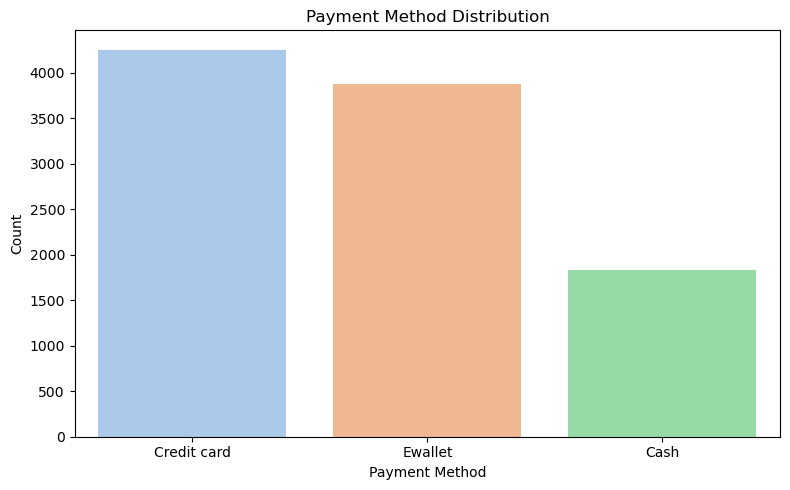

In [25]:
## Payment Method Trends
# Count of each payment method
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Payment_Method', palette='pastel', order=df['Payment_Method'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Monthly Sales Trends

/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_6176/3987360837.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


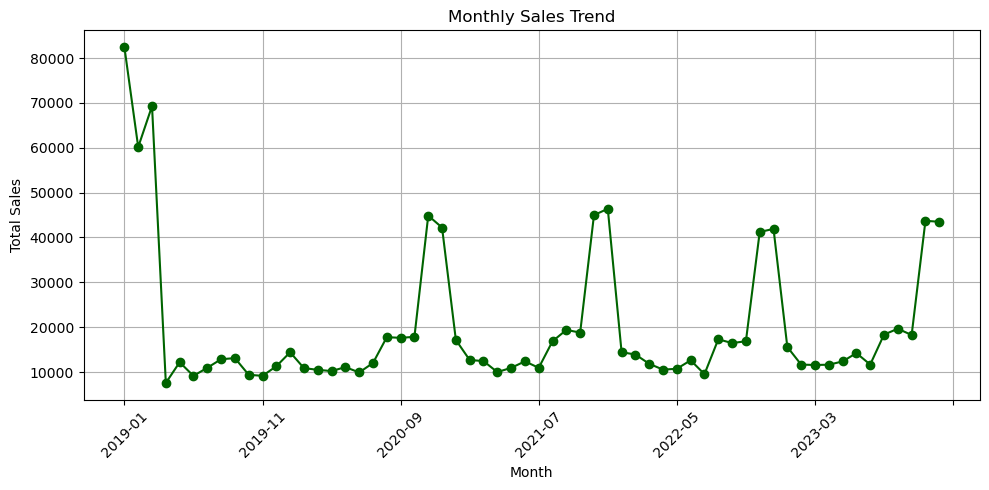

In [26]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month-year
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate monthly sales
monthly_sales = df.groupby('Month')['Total_Amount'].sum()

# Plot
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='darkgreen')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Profit by City and Category

In [1]:
# Total profit margin by city
plt.figure(figsize=(12,6))  # Increase figure size for more spacing
sns.barplot(data=df, x='City', y='Profit_margin', estimator=sum, palette='cubehelix')
plt.title("Total Profit Margin by City")
plt.xlabel("City")
plt.ylabel("Profit Margin (Sum)")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align right
plt.tight_layout(pad=50)  # Add padding between labels and plot
plt.tight_layout()
plt.savefig('outputs/profit_margin_by_city.png', dpi=300)
plt.show()


NameError: name 'plt' is not defined

/var/folders/2h/wdnj9m8x54n95cpd51y5x77c0000gn/T/ipykernel_6176/958947129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Profit_margin', y='category', estimator=sum, palette='magma')


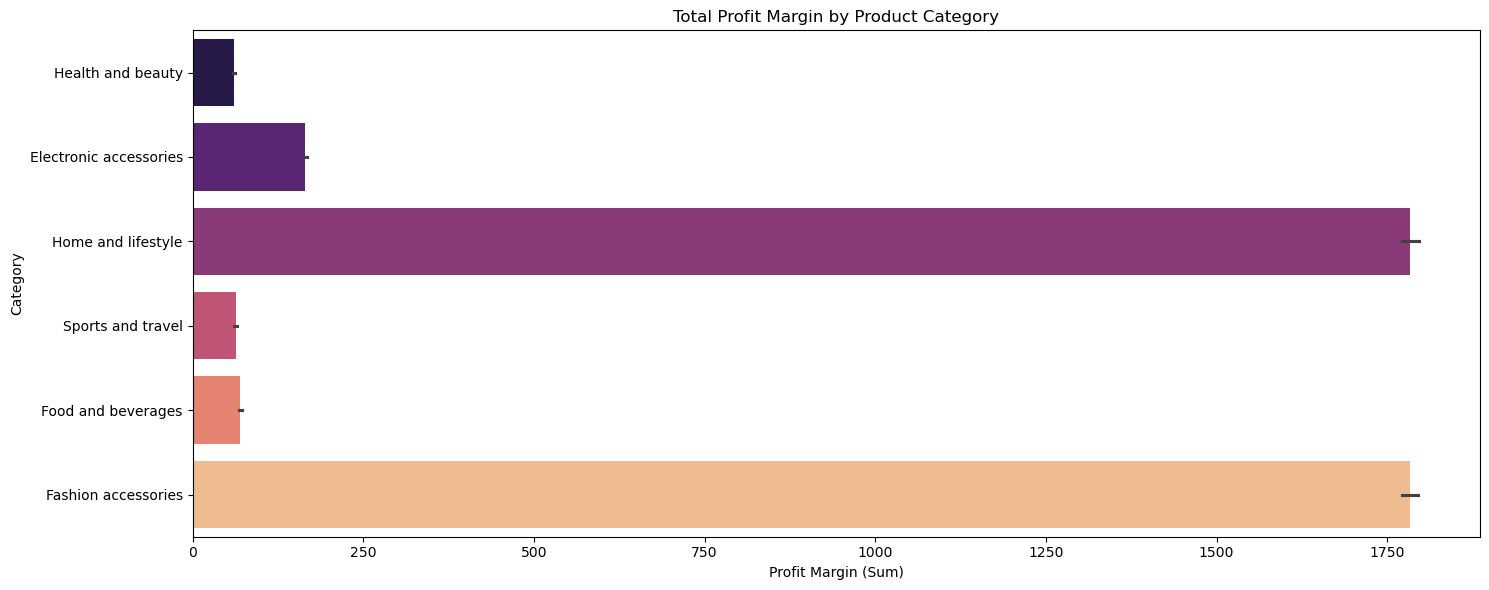

In [31]:
# Total profit margin by category
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='Profit_margin', y='category', estimator=sum, palette='magma')
plt.title("Total Profit Margin by Product Category")
plt.xlabel("Profit Margin (Sum)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()